<h1 style = "font-size:3rem;color:darkcyan"> Music genre classication - Train RNN - LSTM Model </h1>

In [6]:
# importing libraries
import numpy as np
import tensorflow as tf
import json
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [7]:
# prepare dataset
def import_dataset(dataset_path):
   
    # open json file
    with open(dataset_path, 'r') as f:
        data = json.load(f)
    
    # split list into different np arrays
    mappings = np.array(data['mappings']) 
    inputs = np.array(data['MFCC'])
    targets = np.array(data['labels'])
    filenames = np.array(data['filenames'])
    
    return mappings, inputs, targets, filenames

In [8]:
mappings, inputs, targets, filenames = import_dataset('data.json')

In [9]:
def train_val_test_split(x, y, filenames, test_size = 0.25, val_size = 0.2):
    if (0 < test_size < 1)  and (0 < val_size < 1):
        train_size = 1 - test_size - val_size
        if train_size > 0:

            # train test split
            (
            x_train, x_test, 
            y_train, y_test,
            fn_train, fn_test
            ) = train_test_split(x, y, filenames, test_size = test_size)

            #train validation split
            (
            x_train, x_val, 
            y_train, y_val, 
            fn_train, fn_val
            ) = train_test_split(x_train, y_train, fn_train, test_size = val_size)

            return x_train, x_val, x_test, y_train, y_val, y_test, fn_train, fn_val, fn_test
        else: 
            print('train size is too small, adjust test and validation sizes')
            return
    else:
        print('test and validation size should be between 0 and 1!')
        return

In [10]:
# split data into train, validation and test sets
(
x_train, x_val, x_test,
y_train, y_val, y_test,
fn_train, fn_val, fn_test
) = train_val_test_split(inputs, targets, filenames, test_size = 0.25, val_size = 0.2)

In [23]:
def build_RNN_LSTM_model(input_shape, output_len):
    
    # create model
    model = tf.keras.Sequential()
    
    # 2 LSTM layers
    model.add(tf.keras.layers.LSTM(64, input_shape = input_shape, return_sequences=True))
    model.add(tf.keras.layers.LSTM(64))
    
    # dense layer
    model.add(tf.keras.layers.Dense(64, activation = 'relu'))
    model.add(tf.keras.layers.Dropout(0.3))
   
    # output layer with softmax
    model.add(tf.keras.layers.Dense(output_len, activation = 'softmax'))
    
    return model

In [24]:
# build model
input_shape = (x_train.shape[1], x_train.shape[2])
model = build_RNN_LSTM_model(input_shape, len(mappings))

In [25]:
learning_rate = 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate)
model.compile(optimizer = optimizer,
             loss='sparse_categorical_crossentropy',
             metrics = ['accuracy'])


In [26]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 130, 64)           19968     
                                                                 
 lstm_7 (LSTM)               (None, 64)                33024     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 57,802
Trainable params: 57,802
Non-trainable params: 0
_________________________________________________________________


In [27]:
history = model.fit(x_train, y_train,
                   validation_data = (x_val, y_val),
                   batch_size = 32, 
                   epochs = 30)

Epoch 1/30
188/188 [==============================] - 35s 149ms/step - loss: 2.2307 - accuracy: 0.1922 - val_loss: 2.0914 - val_accuracy: 0.3293
Epoch 2/30
188/188 [==============================] - 24s 129ms/step - loss: 1.9560 - accuracy: 0.3385 - val_loss: 1.7932 - val_accuracy: 0.4001
Epoch 3/30
188/188 [==============================] - 16s 83ms/step - loss: 1.7248 - accuracy: 0.4020 - val_loss: 1.6012 - val_accuracy: 0.4616
Epoch 4/30
188/188 [==============================] - 11s 60ms/step - loss: 1.5956 - accuracy: 0.4359 - val_loss: 1.4950 - val_accuracy: 0.4916
Epoch 5/30
188/188 [==============================] - 12s 62ms/step - loss: 1.5077 - accuracy: 0.4671 - val_loss: 1.4311 - val_accuracy: 0.5023
Epoch 6/30
188/188 [==============================] - 11s 61ms/step - loss: 1.4533 - accuracy: 0.4848 - val_loss: 1.3981 - val_accuracy: 0.5164
Epoch 7/30
188/188 [==============================] - 11s 61ms/step - loss: 1.4149 - accuracy: 0.4983 - val_loss: 1.3508 - val_accurac

In [28]:
def plot_training_history(history, figsize = [15,6]):
    
    fig, ax = plt.subplots(2, figsize=figsize)
    
    # create accuracy subplot
    ax[0].plot(history.history['accuracy'], label = 'Training Accuracy')
    ax[0].plot(history.history['val_accuracy'], label = 'Validation Accuracy')
    ax[0].set_ylabel('Accuracy')
    ax[0].legend(loc='lower right')
    ax[0].set_title('Accuracy Evaluation')
    
    # create error subplot
    ax[1].plot(history.history['loss'], label = 'Training Error')
    ax[1].plot(history.history['val_loss'], label = 'Validation Error')
    ax[1].set_ylabel('Error')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(loc='upper right')
    ax[1].set_title('Error Evaluation')
    
    plt.show()

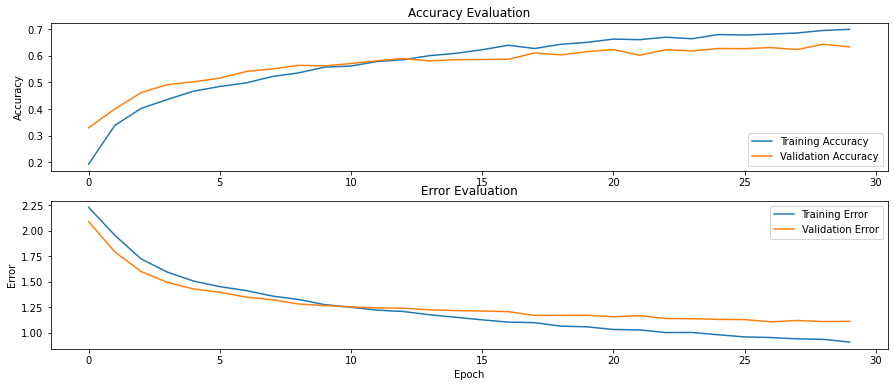

In [29]:
plot_training_history(history)